In [1]:
import numpy as np
import scanpy as sc
import multigrate as mtg
import anndata as ad
import scipy
from scipy import sparse
import os
import matplotlib.pyplot as plt

Global seed set to 0
/home/icb/leonardo.golinelli/.conda/envs/multigrate/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/icb/leonardo.golinelli/.conda/envs/multigrate/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
def load_combined_adata(path):
    print("loading combined adata..")
    combined = ad.read_h5ad(path + "combined.h5ad")   
    return combined

In [3]:
def compute_umap(combined):
    print("computing neighbours..")
    sc.pp.neighbors(combined, use_rep="latent", metric="cosine")
    print("computing umap..")
    sc.tl.umap(combined)    

In [4]:
def write_umap(combined, path):
    print("writing combined anndata with umap")
    combined.write(path +"combined_umap.h5ad", compression="gzip")
    print("combined adata with umap written successfully!")

In [5]:
def plot_umap(combined, path):
    print("plotting umap")
    os.makedirs(path + "umaps/", exist_ok=True)
    #plt.figure(figsize=(4,4), dpi=100)
    ax = sc.pl.umap(combined, color=["Annotation_major_subset", "Annotation_cell_type"], wspace=0.65, return_fig=True)
    plt.show()
    fig = ax.get_figure()
    fig.savefig(path+'umaps/cell_type.png')
    plt.close()

In [6]:
def main(int_type_list = ['cite_integration', 'full_integration', 'reduced_model_res'],
         integ_coef_list = [1, 50, 100, 150, 200]):
    for int_type in int_type_list: #run model by type of integration (cite, full, full/reduced)
        for integ_coef_value in integ_coef_list: #run model by different values of the integ_coef parameter
            print("")
            print("running integration type: {}\nwith integration coefficient: {}".format(int_type, integ_coef_value), end='\n\n')
            result_path = "../results/multigrate/" + int_type + "/coef_" + str(integ_coef_value) + "/"
            combined = load_combined_adata(result_path)
            compute_umap(combined)
            write_umap(combined, result_path)
            plot_umap(combined, result_path)


running integration type: full_integration
with integration coefficient: 100

loading combined adata..
computing neighbours..
computing umap..
writing combined anndata with umap
combined adata with umap written successfully!
plotting umap


/home/icb/leonardo.golinelli/.conda/envs/multigrate/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/leonardo.golinelli/.conda/envs/multigrate/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


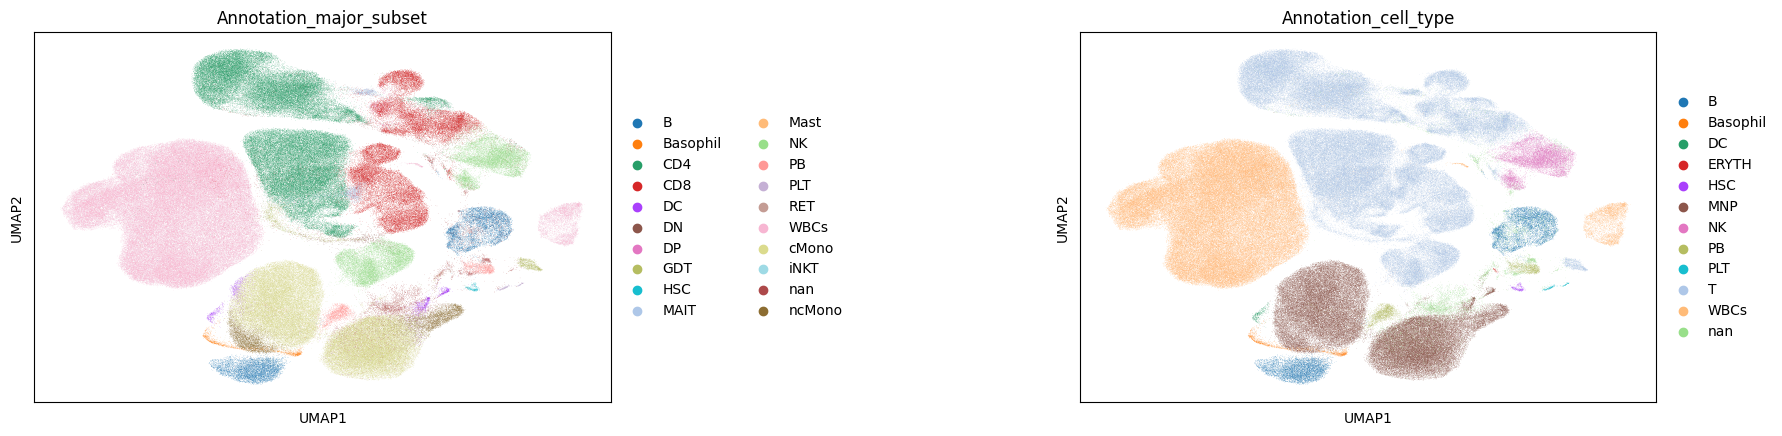

In [9]:
main(int_type_list = ['full_integration'],
     integ_coef_list = [100])